## Travel Insurance

__Introduction to project 2 – Problem Statement:__

#### Improve “Travel Opt-in conversions” :
##### There is a Travel Agency firm available with all the data based of different customers who have booked travel ticket along with whether they did opt for insurance. They want to improve the insurance opt-in from their customers. They are planning to improve the traveller insurance opt-in ratio.The task is to train a model that can predict whether a Customer would opt or not-opt in the Insurance based on the given attributes. Basically, it’s a classification problem.

#### Explanation of Feature :

##### Agency    		: Name of the Agency Customer used for Booking the travel. 
##### Agency Type              	: Type of the Agency (eg. Air, Water, Rail, Road) 
##### Distribution Channel  	: How were the Tickets booked, medium like Online or Offline.
##### Duration                    	: Duration of the Travel
##### Destination                 : Destination of the Travel
##### Net Sales                   	: Total Sales of the Tickets.
##### Age                         	: Age of the Customer who booked the ticket. 
##### Claim                       	: Whether the Customer opt for claim (Target Column) 


##### Workflow

![](Project.png)

Aim : Predict whether the insurance policies are claimed (classification)


Code Snippets:

In [1]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings

In [2]:
# Reading the DataFrame
df = pd.read_csv("Capstone/travel.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,81,No
1,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,F,71,No
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,NaN,32,No
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,NaN,32,No
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,NaN,41,No


In [3]:
#Checking for Null values

print (df.shape)
df.isnull().sum()

(63326, 11)


Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
Claim                       0
dtype: int64

In [4]:
# Information of the Data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Duration              63326 non-null  int64  
 5   Destination           63326 non-null  object 
 6   Net Sales             63326 non-null  float64
 7   Commision (in value)  63326 non-null  float64
 8   Gender                18219 non-null  object 
 9   Age                   63326 non-null  int64  
 10  Claim                 63326 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [5]:
# Descibing the Data.
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Check Distribution Channel

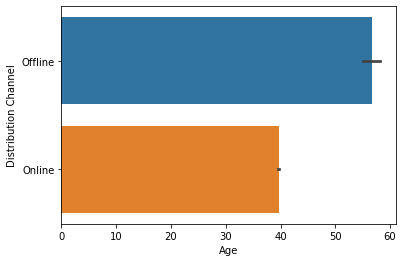

In [6]:
sns.barplot(data=df,x="Age",y="Distribution Channel")

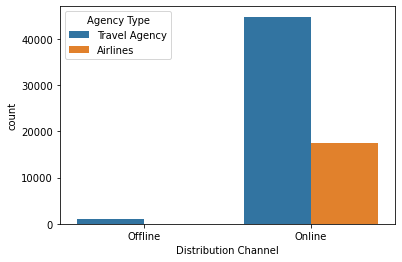

In [7]:
sns.countplot(x='Distribution Channel', data=df, hue='Agency Type') # Create some data

In [8]:
import dtale
dtale.show(df)

2020-12-07 21:06:16,707 - INFO     - NumExpr defaulting to 4 threads.


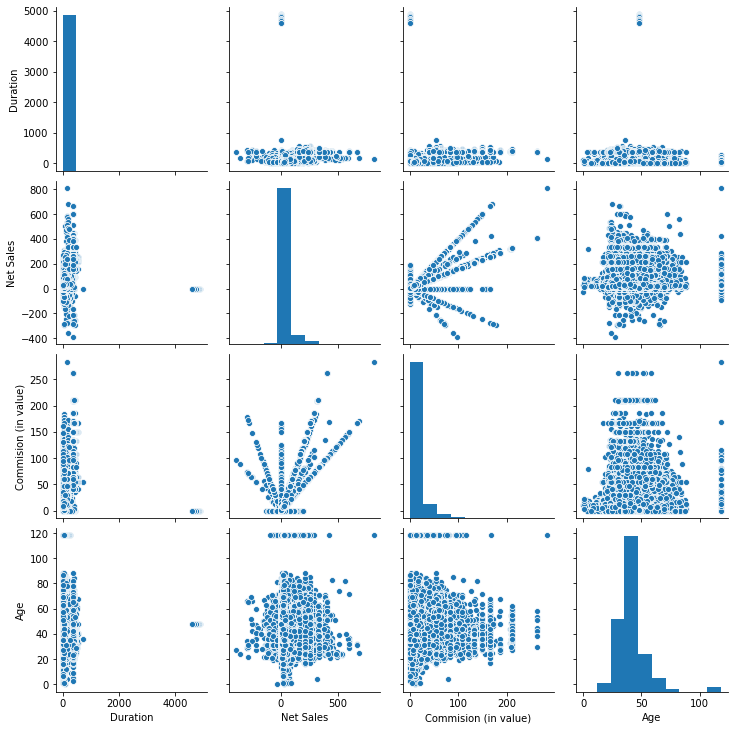

In [9]:
sns.pairplot(df)

Sweetviz library Implementation

In [10]:
import sweetviz

In [11]:
my_report = sweetviz.analyze([df,"Insurance"],target_feat="Claim")

In [12]:
my_report.show_html("Report.html")

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Inter Quartile Range Identification

In [13]:
import scipy.stats as stats


Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)

IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,upper_bound)

Duration               -57.000
Net Sales              -27.000
Commision (in value)   -17.325
Age                     23.000
dtype: float64 Duration                119.000
Net Sales                93.000
Commision (in value)     28.875
Age                      55.000
dtype: float64


In [14]:
df = df[~((df < lowqe_bound) |(df > upper_bound)).any(axis=1)]

#find how many rows are left in the dataframe 
df.shape

(45598, 11)

Heat Map

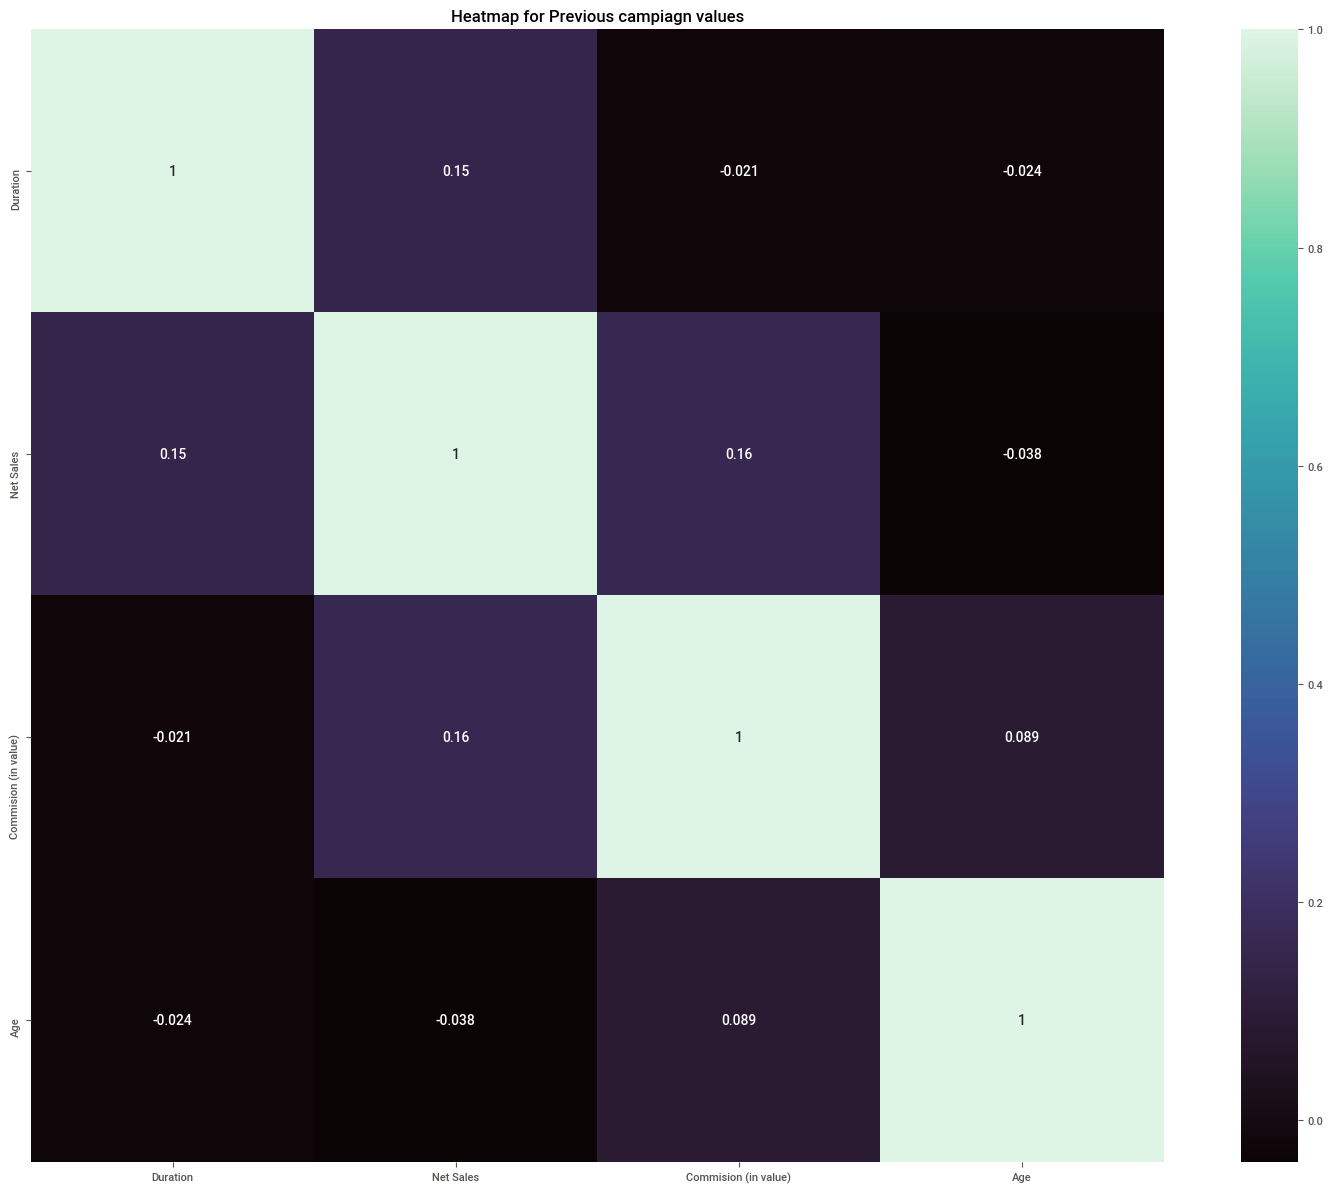

In [15]:
import seaborn as sns

plt.figure(figsize =(20,15))
sns.heatmap(df.corr(),square = True, annot = True,cmap= 'mako' )
plt.title("Heatmap for Previous campiagn values")
plt.show()

Droppping Gender column as too many null values
###### i.e Gender                  45107

In [16]:
df1 =df.drop(["Gender",],axis=1,inplace=True)

/home/vikram/.local/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
print("\n",df.Agency.value_counts())


 EPX    29846
C2B     5138
JZI     4499
CWT     3612
SSI      871
RAB      530
KML      287
LWC      250
ART      244
TST      235
CCR       45
CBH       22
CSR       19
Name: Agency, dtype: int64


In [18]:
df2 =df.groupby('Agency').filter(lambda x : len(x)>1000)
df2 = df.groupby("Product Name").filter(lambda x : len(x)>1000)
df2 = df.groupby("Destination").filter(lambda x : len(x)>50)

In [19]:
result = pd.get_dummies(data=df2, columns=['Agency', "Agency Type",'Product Name','Distribution Channel','Destination',"Claim"])

In [20]:
result.head()


,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_SRI LANKA,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM,Claim_No,Claim_Yes
4,79,-19.8,11.88,41,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,57,-19.8,11.88,44,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
11,1,-18.0,6.30,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,39,-25.0,0.00,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
18,3,-18.0,6.30,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
print(result.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44683 entries, 4 to 63325
Data columns (total 80 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Duration                                          44683 non-null  int64  
 1   Net Sales                                         44683 non-null  float64
 2   Commision (in value)                              44683 non-null  float64
 3   Age                                               44683 non-null  int64  
 4   Agency_ART                                        44683 non-null  uint8  
 5   Agency_C2B                                        44683 non-null  uint8  
 6   Agency_CBH                                        44683 non-null  uint8  
 7   Agency_CCR                                        44683 non-null  uint8  
 8   Agency_CSR                                        44683 non-null  uint8  
 9   Agency_CWT       

### Train-Test Split

In [22]:
df.columns.get_loc("Claim")

9

In [23]:
X = result.iloc[:,:-1]
y = result["Claim_Yes"]

In [24]:
EDA = pd.merge(df, y, left_index=True, right_index=True)
EDA.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Claim_Yes
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,41,No,0
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,57,THAILAND,-19.8,11.88,44,No,0
11,JZI,Airlines,Online,Basic Plan,1,MALAYSIA,-18.0,6.30,47,No,0
14,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,VIET NAM,-25.0,0.00,36,No,0
18,JZI,Airlines,Online,Basic Plan,3,MALAYSIA,-18.0,6.30,47,No,0


Checking for Imbalancy in the Data set.

In [25]:
print(X.shape)
print(y.shape)

(44683, 79)
(44683,)


Text(0, 0.5, 'Channel')

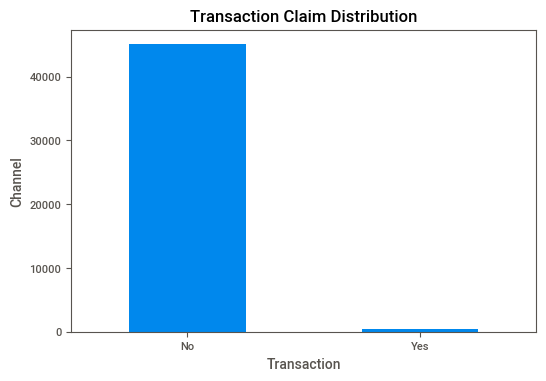

In [26]:
count_classes = pd.value_counts(df['Claim'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Claim Distribution")

# plt.xticks(range(2), LABELS)

plt.xlabel("Transaction")

plt.ylabel("Channel")

This shows that the data is imbalanced as the Bar plot show.

In [27]:
#Get the Claimed and the Non--claimed Transaction.

Claimed = EDA[EDA["Claim"]==1]
Unclaimed = EDA[EDA["Claim"]==0]

In [28]:
print(Claimed.shape,Unclaimed.shape)

(0, 11) (0, 11)


Highly Imbalanced data

Performing Under-Sampling

In [29]:
from imblearn.under_sampling import NearMiss

In [30]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_sample(X,y)

In [31]:
print(X_res.shape,y_res.shape)

(972, 79) (972,)


In [32]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 44197, 1: 486})
Resampled dataset shape Counter({0: 486, 1: 486})


Performing Over Sampling

In [33]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [34]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek()
X,y=smk.fit_sample(X,y)

In [35]:
X.shape,y.shape

((88388, 79), (88388,))

In [36]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 44194, 1: 44194})
Resampled dataset shape Counter({0: 486, 1: 486})


Random Over Sampling

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
os =  RandomOverSampler() # ration argument didn't work

In [39]:
X_train_res, y_train_res = os.fit_sample(X, y)

In [40]:
X_train_res.shape,y_train_res.shape

((88388, 79), (88388,))

In [41]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 44194, 1: 44194})
Resampled dataset shape Counter({0: 44194, 1: 44194})


Top Feature Selection 

In [42]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest,f_classif

In [43]:
import warnings

Model Building

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# print(len(X_train.index))
# print(len(X_test.index))
# print(y_train.sum())
# print(y_test.sum())

In [45]:
from sklearn.linear_model import LogisticRegression

lg= LogisticRegression()
lg.fit(X_train,y_train)

y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)

/home/vikram/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [46]:
# Finding the Co-effiecnt 
lg.coef_

array([[ 3.64135118e-03,  1.23404068e-02, -8.05277055e-03,
         7.91761583e-03, -1.56168085e-01,  5.67506095e-01,
         8.71210863e-04,  1.04024187e-02, -2.21740861e-03,
        -2.51591496e-01, -3.18657932e-01, -4.27692450e-01,
        -2.27099981e-01, -1.21426879e-01, -1.35598760e-01,
        -2.17827933e-01, -2.84069369e-02,  2.71393807e-01,
        -1.68648018e-01, -5.30988166e-01, -2.73096977e-02,
        -1.42022306e-01, -2.65706396e-01, -2.44442846e-01,
        -1.31766455e+00,  1.00069126e-02, -3.74322622e-01,
        -7.48409958e-02, -2.51591496e-01, -5.39342827e-01,
        -3.55242343e-02, -3.09492539e-02, -6.23399083e-02,
        -2.17827933e-01, -2.83443762e-02, -6.25606805e-05,
        -4.81108647e-01, -2.00276138e-02,  1.50369990e+00,
        -3.10318667e-01, -2.49568582e-02, -2.27548067e-02,
        -1.48319695e-01, -1.19674662e-01, -9.95246050e-02,
        -2.44912522e-01, -1.00186618e-01, -1.05203304e-01,
        -1.73534070e-02, -3.91695265e-01, -2.73862433e-0

In [47]:
# To avoid the warring errors
import warnings
warnings.filterwarnings("ignore")

In [48]:
# import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score,f1_score,accuracy_score
print("\n Train Data ")
print("Recall_Score =",recall_score(y_train,y_train_pred))
print("precision_score =",precision_score(y_train,y_train_pred))
print("f1_score = ",f1_score(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))


# test data
print("\n Test Data ")
print('1.Report:\n',classification_report(y_test, y_test_pred))
print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
print("\n")
print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
print("\n")
print('4.cross validation:',cross_val_score(lg, X, y, cv=3))
print("\n")
print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))


 Train Data 
Recall_Score = 1.0
precision_score = 1.0
f1_score =  1.0
1.0

 Test Data 
1.Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13145
           1       1.00      1.00      1.00     13372

    accuracy                           1.00     26517
   macro avg       1.00      1.00      1.00     26517
weighted avg       1.00      1.00      1.00     26517

2.F1 Score for Logistic Reg: 1.0


3.confusion Matrix for Logistic Reg:
 [[13145     0]
 [    0 13372]]


4.cross validation: [1. 1. 1.]


5.accuracy score:  1.0


In [49]:
from sklearn.tree import DecisionTreeClassifier
dc_model = DecisionTreeClassifier(random_state=0,max_depth= 3) # max_depth decide the amount of time we will divide it 

dc_model.fit(X_train,y_train)

y_train_pred = dc_model.predict(X_train)
y_test_pred = dc_model.predict(X_test)

print(y_train_pred)
print(y_test_pred)

[0 1 1 ... 0 0 1]
[1 1 1 ... 1 1 1]


In [50]:
# import metrics

from sklearn.metrics import recall_score, precision_score,f1_score
print("\n Train Data ")
print("Recall_Score =",recall_score(y_train,y_train_pred))
print("precision_score =",precision_score(y_train,y_train_pred))
print("f1_score = ",f1_score(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))


# test data
print("\n Test Data ")
print('1.Report:\n',classification_report(y_test, y_test_pred))
print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
print("\n")
print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
print("\n")
print('4.cross validation:',cross_val_score(dc_model, X, y, cv=3))
print("\n")
print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))
dc_model.feature_importances_


 Train Data 
Recall_Score = 1.0
precision_score = 1.0
f1_score =  1.0
1.0

 Test Data 
1.Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13145
           1       1.00      1.00      1.00     13372

    accuracy                           1.00     26517
   macro avg       1.00      1.00      1.00     26517
weighted avg       1.00      1.00      1.00     26517

2.F1 Score for Logistic Reg: 1.0


3.confusion Matrix for Logistic Reg:
 [[13145     0]
 [    0 13372]]


4.cross validation: [1. 1. 1.]


5.accuracy score:  1.0


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [51]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=30,max_depth=7,
                                  max_features=2)

rf_model.fit(X_train,y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


print(y_train_pred)
print(y_test_pred)

[0 0 0 ... 1 0 1]
[1 0 1 ... 0 1 1]


In [52]:
# Random Forest Metrics

from sklearn.metrics import recall_score, precision_score,f1_score,accuracy_score
print("\n Train Data ")
print("Recall_Score =",recall_score(y_train,y_train_pred))
print("precision_score =",precision_score(y_train,y_train_pred))
print("f1_score = ",f1_score(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))

# test data
print("\n Test Data ")
print('1.Report:\n',classification_report(y_test, y_test_pred))
print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
print("\n")
print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
print("\n")
print('4.cross validation:',cross_val_score(rf_model, X, y, cv=3))
print("\n")
print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))


 Train Data 
Recall_Score = 0.7538446564142496
precision_score = 0.876098186342898
f1_score =  0.8103866208604363
0.8242633867239902

 Test Data 
1.Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84     13145
           1       0.88      0.76      0.81     13372

    accuracy                           0.83     26517
   macro avg       0.83      0.83      0.83     26517
weighted avg       0.83      0.83      0.83     26517

2.F1 Score for Logistic Reg: 0.8142811141523104


3.confusion Matrix for Logistic Reg:
 [[11788  3257]
 [ 1357 10115]]


4.cross validation: [0.97417099 0.9905305  0.94789899]


5.accuracy score:  0.8259984161104197


In [53]:
def logistic_model():
    print('1.Report:\n',classification_report(y_test, y_test_pred))
    print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
    print("\n")
    print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
    print("\n")
    print('4.cross validation:',cross_val_score(lg, X, y, cv=3))
    print("\n")
    print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))

In [54]:
def random_model():
    print('1.Report:\n',classification_report(y_test, y_test_pred))
    print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
    print("\n")
    print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
    print("\n")
    print('4.cross validation:',cross_val_score(rf_model, X, y, cv=3))
    print("\n")
    print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))

In [55]:
def decision_model():
    print('1.Report:\n',classification_report(y_test, y_test_pred))
    print("2.F1 Score for Logistic Reg:",f1_score(y_test_pred,y_test))
    print("\n")
    print('3.confusion Matrix for Logistic Reg:\n',confusion_matrix(y_test_pred,y_test))
    print("\n")
    print('4.cross validation:',cross_val_score(dc_model, X, y, cv=3))
    print("\n")
    print("5.accuracy score: ",accuracy_score(y_test,y_test_pred))

In [56]:
print("logistic Model",logistic_model())
print("\n Random Model",random_model())
print("\n decision Model",decision_model())

1.Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84     13145
           1       0.88      0.76      0.81     13372

    accuracy                           0.83     26517
   macro avg       0.83      0.83      0.83     26517
weighted avg       0.83      0.83      0.83     26517

2.F1 Score for Logistic Reg: 0.8142811141523104


3.confusion Matrix for Logistic Reg:
 [[11788  3257]
 [ 1357 10115]]


4.cross validation: [1. 1. 1.]


5.accuracy score:  0.8259984161104197
logistic Model None
1.Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84     13145
           1       0.88      0.76      0.81     13372

    accuracy                           0.83     26517
   macro avg       0.83      0.83      0.83     26517
weighted avg       0.83      0.83      0.83     26517

2.F1 Score for Logistic Reg: 0.8142811141523104


3.confusion Matrix for Logistic Reg:
 [[11788  3257]
 [ 1357 1

Sweetviz Library Implementation on the result data.

In [57]:
# sns.pairplot(result)

Things to do :
1. Take top 10 feature importance
2. Tune Random F and tune class_fit
3. AUC and ROC curve (Done)

Report :
1. Basic Code snippet
2. Explian the imp feature
3. Explain the Algo
4. Code Snippet and explain
5. Conclusion
6. Future Scope 


In [58]:

import sklearn
sklearn.__version__

'0.23.1'

[Text(193.75, 283.125, 'X[78] <= 0.5\ngini = 0.5\nsamples = 61871\nvalue = [31049, 30822]'),
 Text(96.875, 94.375, 'gini = 0.0\nsamples = 30822\nvalue = [0, 30822]'),
 Text(290.625, 94.375, 'gini = 0.0\nsamples = 31049\nvalue = [31049, 0]')]

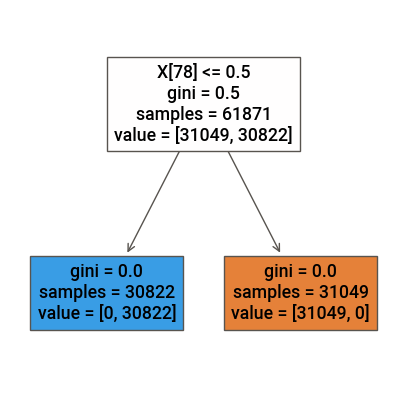

In [59]:

from sklearn import tree
plt.figure(figsize=(5,5))
tree.plot_tree(dc_model,filled=True)

In [60]:
path = dc_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [61]:
ccp_alphas

array([0.        , 0.49999327])

In [62]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4999932694981516


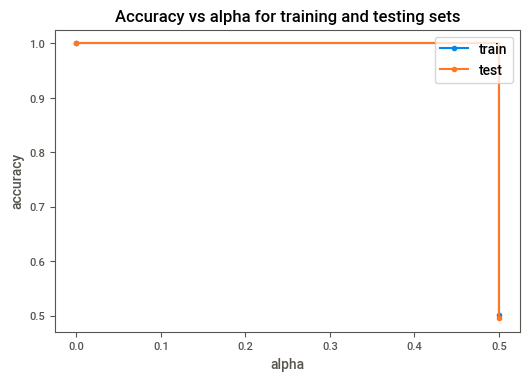

In [63]:

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [64]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [65]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0

[Text(193.75, 283.125, 'X[78] <= 0.5\ngini = 0.5\nsamples = 61871\nvalue = [31049, 30822]'),
 Text(96.875, 94.375, 'gini = 0.0\nsamples = 30822\nvalue = [0, 30822]'),
 Text(290.625, 94.375, 'gini = 0.0\nsamples = 31049\nvalue = [31049, 0]')]

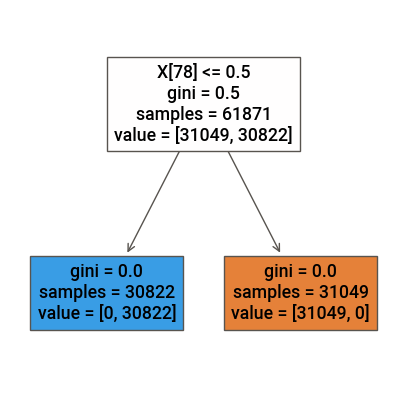

In [66]:
from sklearn import tree
plt.figure(figsize=(5,5))
tree.plot_tree(clf,filled=True)

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# log_ROC_auc = roc_auc_score (y_test,y_test_pred)


In [68]:

## Apply RandomForestClassifier
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9630410403374225
RF test roc-auc: 0.9641828749877543


In [69]:
ytrain_pred = lg.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = lg.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 1.0
Logistic test roc-auc: 1.0


Adaboost Classifier

In [70]:

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 1.0
Adaboost test roc-auc: 1.0


KNNClassifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9996364281008336
Adaboost test roc-auc: 0.9895680777931144


In [72]:
pred=[]
for model in [rf_model,lg,dc_model,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9999999999999999


In [73]:
pd.concat(pred,axis=1)

,0,1,2,3,4
0,0.733789,0.999641,1.0,1.000000e+00,1.0
1,0.372190,0.996507,1.0,1.000000e+00,1.0
2,0.635356,0.999576,1.0,1.000000e+00,1.0
3,0.378240,0.000852,0.0,2.220446e-16,0.0
4,0.301755,0.000279,0.0,2.220446e-16,0.0
...,...,...,...,...,...
26512,0.353034,0.000448,0.0,2.220446e-16,0.0
26513,0.759071,0.999551,1.0,1.000000e+00,1.0
26514,0.497411,0.999242,1.0,1.000000e+00,1.0
26515,0.738882,0.999626,1.0,1.000000e+00,1.0


In [74]:
final_prediction

0        0.946686
1        0.873739
2        0.926987
3        0.075818
4        0.060407
           ...   
26512    0.070697
26513    0.951724
26514    0.899331
26515    0.947702
26516    0.954513
Length: 26517, dtype: float64

In [75]:

#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.95795764, 0.95795764, 0.95795608, ..., 0.03793442, 0.03793433,
       0.0322408 ])

In [76]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
650,0.659344,0.999962
651,0.319977,0.998756
652,0.319966,0.998718
653,0.315015,0.997209
654,0.315013,0.997172


In [77]:
accuracy_ls


,thresholds,accuracy
650,0.659344,0.999962
651,0.319977,0.998756
652,0.319966,0.998718
653,0.315015,0.997209
654,0.315013,0.997172
...,...,...
4,0.957955,0.496285
3,0.957955,0.496210
2,0.957956,0.496172
1,0.957958,0.495720


In [78]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

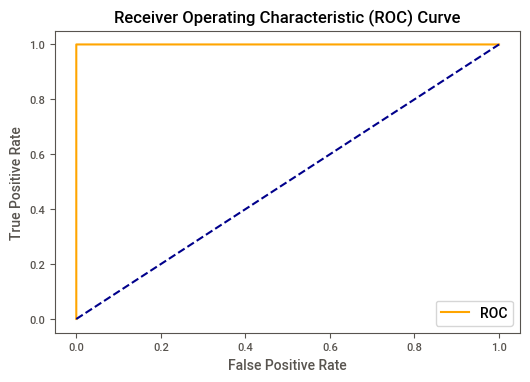

In [79]:
plot_roc_curve(fpr,tpr)

Grid Search 

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameters = {"n_estimators" : (10,30,50,70,90)
             ,"criterion" : ('gini','entropy')
             ,'max_depth': (3,5,7,9,10)
             ,'max_features': ('auto','sqrt')
             ,"min_samples_split" : (2,4,6)
             }

In [82]:
RF_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=False ),param_grid=parameters, cv=3,verbose=True)

In [83]:
RF_grid_model = RF_grid.fit(X_train,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 16.8min finished


In [84]:
RF_grid_model.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_split=6, n_estimators=70,
                       n_jobs=-1)

In [85]:
RF_grid_model.best_score_

1.0

Top 10 Feature 

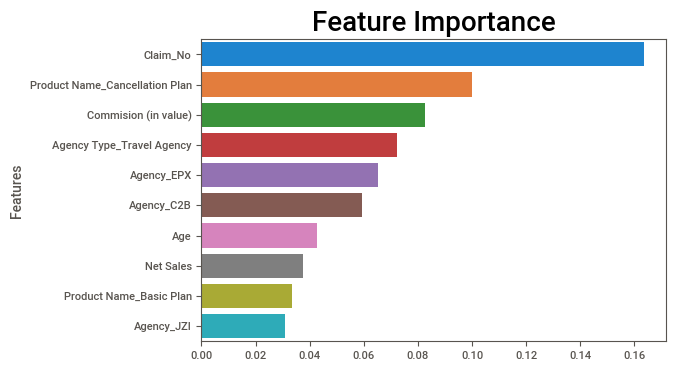

In [86]:
importances = rf_model.feature_importances_
feature_importances=pd.Series(importances,index=X_train.columns).sort_values(ascending =False)
sns.barplot(x=feature_importances[0:10],y=feature_importances.index[0:10])
plt.title("Feature Importance",size=20)
plt.ylabel("Features")
plt.show()

In [ ]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()